<a href="https://colab.research.google.com/github/deepa2909/Naive-Bayes-Classifier/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```
The Naive Bayes Classifier (NB)

The data universalbank.csv contains data on 5000 customers of Universal Bank. The data include customer demographic information (age, income, etc.), the customer’s relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign. In this exercise, I focused on two predictors: age, income, experience, and the outcome Personal Loan.



In [ ]:
# Import required packages for this chapter
import pandas as pd
from sklearn import preprocessing 
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import confusion_matrix


# Personal Loan Acceptance.

In [ ]:
# Load the data into band_df dataframe bank_df
bank_df = pd.read_csv("https://raw.githubusercontent.com/timcsmith/MIS536-Public/master/Data/UniversalBank.csv")
print(bank_df)

# Use critical functions to explore the dataframe using print() to show results


        ID  Age  Experience  ...  CD Account  Online  CreditCard
0        1   25           1  ...           0       0           0
1        2   45          19  ...           0       0           0
2        3   39          15  ...           0       0           0
3        4   35           9  ...           0       0           0
4        5   35           8  ...           0       0           1
...    ...  ...         ...  ...         ...     ...         ...
4995  4996   29           3  ...           0       1           0
4996  4997   30           4  ...           0       1           0
4997  4998   63          39  ...           0       0           0
4998  4999   65          40  ...           0       1           0
4999  5000   28           4  ...           0       1           1

[5000 rows x 14 columns]


In [ ]:

# let's replace any spaces in the column names with underscore
bank_df.columns = [s.strip().replace(' ','_') for s in bank_df.columns] # list comprehension, all columns


In [ ]:
# Does the data needs further cleaning?
bank_df.describe()
bank_df.isna().sum()
bank_df.count()

# If you think so, write your clearning process here.

ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIP_Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal_Loan         5000
Securities_Account    5000
CD_Account            5000
Online                5000
CreditCard            5000
dtype: int64

In [ ]:
# Only keep the columns we need: Creditcard and Online .Drop the rest.
bank_df.cols = bank_df.drop(columns=['ID','Age', 'Experience', 'Income', 'ZIP_Code','Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account' ])
bank_df.cols

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,Personal_Loan,Online,CreditCard
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,1
...,...,...,...
4995,0,1,0
4996,0,1,0
4997,0,0,0
4998,0,1,0


# The data split into training (60%) and validation (40%) sets.

In [ ]:
# Split the data into training and validation sets
train_df, validation_df = train_test_split(bank_df.cols, test_size=0.4, random_state=123)
print('Training set:', train_df.shape, 'Validation set:', validation_df.shape)

Training set: (3000, 3) Validation set: (2000, 3)


In [ ]:
# Construct the model the perform analysis
outcome = 'Personal_Loan'
X = list(bank_df.cols)
X.remove(outcome)
train_X_nb = train_df[X]
valid_X_nb = validation_df[X]
train_y_nb = train_df[outcome]
valid_y_nb = validation_df[outcome]
#print(train_X_nb.head())
#print(valid_X_nb.head())




In [ ]:
# Predict the classification for test dataset
classifier = GaussianNB()
classifier.fit(train_X_nb, train_y_nb)
# Append your prediction, predicted probability to the testing dataset and print the new dataset out using print()
# You should be able to view your prediction, observed outcome, and predictors for each data point side by side.

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
# calculate the accuracy of your prediction against the observed outcome.
y_predict_nb =classifier.predict(valid_X_nb)
y_probpred_nb = classifier.predict_proba(valid_X_nb)
print("prediction: ", y_predict_nb, "Probability: ", y_probpred_nb)


# How well do you think the model does?

prediction:  [0 0 0 ... 0 0 0] Probability:  [[0.91501308 0.08498692]
 [0.88728471 0.11271529]
 [0.91229342 0.08770658]
 ...
 [0.91501308 0.08498692]
 [0.91501308 0.08498692]
 [0.88379042 0.11620958]]


In [ ]:
print("Accuracy", metrics.accuracy_score(valid_y_nb, y_predict_nb))
print("Recall", metrics.recall_score(valid_y_nb, y_predict_nb, average ='weighted'))
print("Precision", metrics.precision_score(valid_y_nb, y_predict_nb, average ='weighted'))

Accuracy 0.902
Recall 0.902
Precision 0.813604


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Interpret your results:
confusion_nb = confusion_matrix(valid_y_nb, y_predict_nb)
confusion_nb


array([[1804,    0],
       [ 196,    0]])

The model is doing good at predicticting FP =0 but is doing really bad at predicting TN = 0, this value doesn't hurt the business but because other ways to find customer not interested in personal loan can be found out. With huge no of FN = 196, business can call customers in the FN and confirm about the choices they want to make. The model is going a good job at predicting TP = 1804 and it is predicting FP =0. Very well done, thats what the model should do






# Lesson learned from this lab:
Naive bayes, although a simple model, based on the assumption that
features are independent of each other, the model actually performs well with a reasonalble accuracy of the model.


# Automobile Accidents

The file accidents.csv contains information on 42,183 actual automobile accidents in 2001 in the United States that involved one of three levels of injury: NO INJURY, INJURY, or FATALITY. For each accident, additional information is recorded, such as day of week, weather conditions, and road type. A firm might be interested in developing a system for quickly classifying the severity of an accident based on three predictors: weather conditions (WEATHER_R), traffic conditions (TRAF_CON_R), and road type (INT_HWY).

Our goal here is to predict whether an accident just reported will involve fatality (MAX_SEV_IR = 2), a non fetal injury (MAX_SEV_IR = 1) or not injury (MAX_SEV_IR = 0).

Partition the data into training (80%) and validation (20%) sets.

In [ ]:
# Load the data into band_df dataframe accidents_df
accidents_df = pd.read_csv('https://raw.githubusercontent.com/timcsmith/MIS536-Public/master/Data/accidents.csv')

print(accidents_df)
# Use critical functions to explore the dataframe using print() to show results
accidents_df['MAX_SEV_IR']

       HOUR_I_R  ALCHL_I  ALIGN_I  ...  PRPTYDMG_CRASH  FATALITIES  MAX_SEV_IR
0             0        2        2  ...               0           0           1
1             1        2        1  ...               1           0           0
2             1        2        1  ...               1           0           0
3             1        2        1  ...               1           0           0
4             1        1        1  ...               1           0           0
...         ...      ...      ...  ...             ...         ...         ...
42178         0        2        1  ...               1           0           0
42179         1        2        1  ...               0           0           1
42180         0        2        2  ...               1           0           0
42181         1        2        1  ...               1           0           0
42182         1        2        1  ...               1           0           0

[42183 rows x 24 columns]


0        1
1        0
2        0
3        0
4        0
        ..
42178    0
42179    1
42180    0
42181    0
42182    0
Name: MAX_SEV_IR, Length: 42183, dtype: int64

In [ ]:
accidents_df.columns

Index(['HOUR_I_R', 'ALCHL_I', 'ALIGN_I', 'STRATUM_R', 'WRK_ZONE', 'WKDY_I_R',
       'INT_HWY', 'LGTCON_I_R', 'MANCOL_I_R', 'PED_ACC_R', 'RELJCT_I_R',
       'REL_RWY_R', 'PROFIL_I_R', 'SPD_LIM', 'SUR_COND', 'TRAF_CON_R',
       'TRAF_WAY', 'VEH_INVL', 'WEATHER_R', 'INJURY_CRASH', 'NO_INJ_I',
       'PRPTYDMG_CRASH', 'FATALITIES', 'MAX_SEV_IR'],
      dtype='object')

In [ ]:
# Only keep the columns we need.Drop the rest.
accidents_df.cols = accidents_df.drop(columns=['HOUR_I_R', 'ALCHL_I', 'ALIGN_I', 'STRATUM_R', 'WRK_ZONE', 'WKDY_I_R', 'LGTCON_I_R', 'MANCOL_I_R', 'PED_ACC_R', 'RELJCT_I_R', 'REL_RWY_R', 'PROFIL_I_R', 'SPD_LIM', 'SUR_COND', 'TRAF_WAY', 'VEH_INVL', 'INJURY_CRASH', 'NO_INJ_I', 'PRPTYDMG_CRASH', 'FATALITIES'])
accidents_df.cols

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,INT_HWY,TRAF_CON_R,WEATHER_R,MAX_SEV_IR
0,0,0,1,1
1,1,0,2,0
2,0,1,2,0
3,0,1,1,0
4,0,0,1,0
...,...,...,...,...
42178,0,2,1,0
42179,0,0,1,1
42180,0,0,1,0
42181,0,0,1,0


In [ ]:
accidents_df.cols.columns

Index(['INT_HWY', 'TRAF_CON_R', 'WEATHER_R', 'MAX_SEV_IR'], dtype='object')

In [ ]:
# Split dataset into training set and test set: 80% training and 20% validation
train_df, validation_df = train_test_split(accidents_df.cols, test_size=0.2, random_state=111)
print('Training set:', train_df.shape, 'Validation set:', validation_df.shape)


Training set: (33746, 4) Validation set: (8437, 4)


In [ ]:
# Construct the model the perform analysis
result = 'MAX_SEV_IR'
X = list(accidents_df.cols.columns)
X.remove(result)
train_X_mb = train_df[X]
valid_X_mb = validation_df[X]
train_y_mb = train_df[result]
valid_y_mb = validation_df[result]
print(train_X_mb.head())
print(valid_X_mb.head())



       INT_HWY  TRAF_CON_R  WEATHER_R
19080        1           0          1
33161        0           1          1
34772        0           0          1
26501        0           0          1
37729        0           0          1
       INT_HWY  TRAF_CON_R  WEATHER_R
12812        0           0          1
1871         0           0          2
15702        0           1          2
31085        0           0          1
27525        0           0          1


In [ ]:
# Predict the classification for test dataset
mNB = MultinomialNB()
mNB.fit(train_X_mb, train_y_mb)
# Append your prediction, predicted probability to the testing dataset and print the new dataset out using print()
# You should be able to view your prediction, observed outcome, and predictors for each data point side by side.

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_predict_mb =mNB.predict(valid_X_mb)
y_probpred_mb = mNB.predict_proba(valid_X_mb)
print("Prediction: ", y_predict_mb, "Probability: ", y_probpred_mb)

Prediction:  [0 0 1 ... 1 1 0] Probability:  [[0.49984105 0.48857579 0.01158316]
 [0.5080921  0.48015101 0.01175689]
 [0.48660508 0.50412855 0.00926637]
 ...
 [0.46480262 0.52791314 0.00728424]
 [0.47831723 0.51256069 0.00912209]
 [0.49984105 0.48857579 0.01158316]]


In [ ]:
# compute model accuracy of your prediction against observed outcomes.
print("Accuracy", metrics.accuracy_score(valid_y_mb, y_predict_mb))
print("Recall", metrics.recall_score(valid_y_mb, y_predict_mb, average ='weighted'))
print("Precision", metrics.precision_score(valid_y_mb, y_predict_mb, average ='weighted'))



confusion = metrics.confusion_matrix(valid_y_mb, y_predict_mb)
confusion


Accuracy 0.5112006637430366
Recall 0.5112006637430366
Precision 0.5102798785844577


array([[2736, 1394,    2],
       [2644, 1577,    3],
       [  62,   19,    0]])

# How well do you think the model does?
By looking at the accuracy it is performing right only about 51% of the times. Shows quite low precision and recall value too. 
The confusion matrix shows the model not predicting for class 3 at all compared to the other classes. The prediction is skewed in this case. Actions should be made to incoporate class 3 so that model should be able to make predictions for it too. 

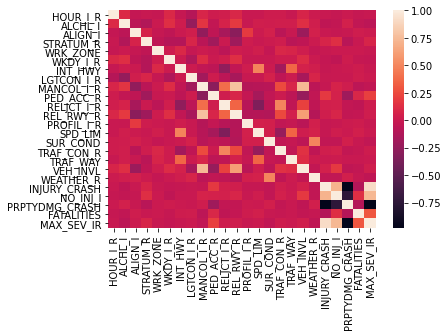

In [ ]:
# Optional Challenge: Can you improve the accuracy of the model to above 0.08 by finding a different set of the predictors?
import seaborn as sns
corr = accidents_df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)
# Show you model below:




To find which other valiable/attribute/feature have close relationship with previously taken attributes, I drew a heatmap, which tell a direct - correlation between INJURY_CRASH	 and MAX_SEV_IR. Therefore, I incoporated that predictor in the model and model accuracy increased from .51 to .99.

Other predictors could also be chosen from the heatmap.

In [ ]:
accidents_df.cols2 = accidents_df.drop(columns=['HOUR_I_R', 'ALCHL_I', 'ALIGN_I', 'STRATUM_R', 'WRK_ZONE', 'WKDY_I_R', 'LGTCON_I_R', 'MANCOL_I_R', 'PED_ACC_R', 'RELJCT_I_R', 'REL_RWY_R', 'PROFIL_I_R', 'SPD_LIM', 'SUR_COND', 'TRAF_WAY', 'VEH_INVL', 'NO_INJ_I', 'PRPTYDMG_CRASH', 'FATALITIES'])
accidents_df.cols2

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  """Entry point for launching an IPython kernel.


,INT_HWY,TRAF_CON_R,WEATHER_R,INJURY_CRASH,MAX_SEV_IR
0,0,0,1,1,1
1,1,0,2,0,0
2,0,1,2,0,0
3,0,1,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
42178,0,2,1,0,0
42179,0,0,1,1,1
42180,0,0,1,0,0
42181,0,0,1,0,0


In [ ]:
# Split dataset into training set and test set: 80% training and 20% validation
train_df, validation_df = train_test_split(accidents_df.cols2, test_size=0.2, random_state=111)
print('Training set:', train_df.shape, 'Validation set:', validation_df.shape)

Training set: (33746, 5) Validation set: (8437, 5)


In [ ]:
# Construct the model the perform analysis
result = 'MAX_SEV_IR'
X = list(accidents_df.cols2.columns)
X.remove(result)
train_X2 = train_df[X]
valid_X2 = validation_df[X]
train_y2 = train_df[result]
valid_y2 = validation_df[result]
print(train_X2.head())
print(valid_X2.head())

       INT_HWY  TRAF_CON_R  WEATHER_R  INJURY_CRASH
19080        1           0          1             0
33161        0           1          1             0
34772        0           0          1             0
26501        0           0          1             0
37729        0           0          1             0
       INT_HWY  TRAF_CON_R  WEATHER_R  INJURY_CRASH
12812        0           0          1             0
1871         0           0          2             0
15702        0           1          2             0
31085        0           0          1             1
27525        0           0          1             1


In [ ]:
# Predict the classification for test dataset
mNB = MultinomialNB()
mNB.fit(train_X2, train_y2)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
y_predict2 =mNB.predict(valid_X2)
y_probpred2 = mNB.predict_proba(valid_X2)
print("Prediction: ", y_predict2, "Probability: ", y_probpred2)

Prediction:  [0 0 0 ... 1 1 1] Probability:  [[6.04633078e-01 3.81376300e-01 1.39906216e-02]
 [7.05924049e-01 2.77790205e-01 1.62857464e-02]
 [7.70804859e-01 2.14582556e-01 1.46125847e-02]
 ...
 [4.77216076e-04 9.99182098e-01 3.40685817e-04]
 [2.10711049e-04 9.99605682e-01 1.83606820e-04]
 [1.49078905e-04 9.99692838e-01 1.58082861e-04]]


In [ ]:
# Interpret your results:
confusion = metrics.confusion_matrix(valid_y2, y_predict2)
confusion


array([[4130,    0,    2],
       [   0, 4223,    1],
       [  81,    0,    0]])

In [ ]:
# compute model accuracy of your prediction against observed outcomes.
print("Accuracy", metrics.accuracy_score(valid_y2, y_predict2))
print("Recall", metrics.recall_score(valid_y2, y_predict2, average ='weighted'))
print("Precision", metrics.precision_score(valid_y2, y_predict2, average ='weighted'))


Accuracy 0.9900438544506341
Recall 0.9900438544506341
Precision 0.9809789725667835


By looking at the confusion matrix, looks like model performing well by the inclusion of predictor INJURY_CRASH in the previous model. The accuracy and TP for each class have increased with few misses. I still see the model is not predicting for class 3, therefore, the model is still performing skewed and needs to incorporate minority class in it while prediction.

Naive bayes works well with multi-class models.
Simple model gives high accuracy with a little effort.

# Lesson learned from this lab:

